# 2.3 퍼셉트론 구현하기

AND, NAND, OR 는 모두 같은 구조의 퍼셉트론이고, 차이는 가중치 매개변수의 값 뿐이다. 

### 2.3.1 간단한 AND 게이트 구현

x1, x2에 대해 가중치 0.5, 0.5, 임계값이 0.7인 간단한 퍼셉트론 구현하기


In [1]:
def AND(x1, x2):
    # weight1, 2, and Thresholds
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = x1*w1 + x2*w2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

In [2]:
AND(0, 0)

0

In [3]:
AND(0, 1)

0

In [4]:
AND(1, 0)

0

In [5]:
AND(1, 1)

1

### 2.3.2 가중치와 편향 적용

In [6]:
import numpy as np

x = np.array([0, 1])
w = np.array([0.5, 0.5])
b = -0.7

In [7]:
# weight * values
w*x

array([0. , 0.5])

In [8]:
# element-wise product
np.sum(w*x)

0.5

In [9]:
# add the bias
np.sum(w*x) + b

-0.19999999999999996

부동소수점에 의한 연산 오차가 있다고 함.

### 2.3.3 가중치와 편향 구현

가중치는 각 입력 신호가 결과에 주는 영향력(중요도)를 조절하는 매개변수고, 편향은 뉴런이 얼마나 쉽게 활성화(결과로 1을 출력)하느냐를 조정하는 매개변수이다.  
이 책에서는 문맥에 따라 셋 모두를 가중치라고 할 때도 있다.

In [10]:
# AND 게이트 구현
def AND(x1, x2):
    import numpy as np
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7       # -theta가 치환됨: bias -b
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    elif tmp > 0:
        return 1

In [11]:
print(AND(0, 0), ',', AND(0,1), ',', AND(1,0), ',', AND(1, 1))

0 , 0 , 0 , 1


In [12]:
# NAND 게이트 구현 (w와 b의 부호만 다름)
def NAND(x1, x2):
#     import numpy as np
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    elif tmp > 0:
        return 1

In [13]:
print(NAND(0, 0), ',', NAND(0,1), ',', NAND(1,0), ',', NAND(1, 1))

1 , 1 , 1 , 0


In [14]:
# OR 게이트 구현 (w와 b만 다름)
def OR(x1, x2):
#     import numpy as np
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    elif tmp > 0:
        return 1

In [15]:
print(OR(0, 0), ',', OR(0,1), ',', OR(1,0), ',', OR(1, 1))

0 , 1 , 1 , 1


## 2.4 퍼셉트론의 한게

XOR 게이트를 생각해본다. 이는 배타적 논리합이라는 논리 회로이다. $x_1$과 $x_2$ 중 한 쪽이 1일 때만 1을 출력한다. 둘 다 1이면 1을 출력하지 않는다는 것이다.  
지금까지 본 퍼셉트론으로는 XOR 게이트를 구현할 수 없다. (엄밀히 말하면 '단층 퍼셉트론'으로 XOR 게이트를 구현할 수 없다는 말.)

OR 게이트는 $x_1$과 $x_2$ 두 축으로 이루어진 평면에서 직선으로 출력을 나눌 수 있지만, XOR 게이트는 직선으로 할 수 없다.  
이때 곡선이라면 가능하다. 즉, 곡선의 영역을 비선형 영역이라고 하고, 직선의 영역을 선형이라고 한다.  

## 2.5  다층 퍼셉트론, XOR 게이트

퍼셉트론의 아름다움은 '층을 쌓아' **다층 퍼셉트론(multi-layer perceptron)**을 만들 수 있다.  
XOR 게이트를 만드는 방법은 다양하지만, 그 중 하나는 앞서 만튼 AND, NAND, OR을 조합하는 것이다.  

NAND 와 OR 게이트에 입력이되고, 각각의 출력이 AND 게이트의 입력으로 이어지도록 한다. 

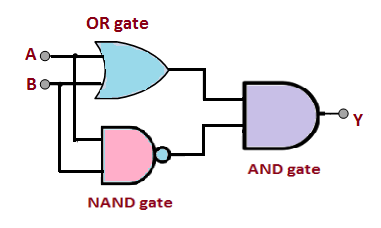 _출처: https://byjus.com/neet/exclusive-or-gate/_

0층의 두 뉴런이 입력 신호를 받아 1층의 뉴런으로 신호를 보내고, 1층의 뉴런이 2층의 뉴런으로 신호를 보내고, 2층의 뉴런은 이 입력 신호를 바탕으로 y를 출력한다.  

In [16]:
def AND(x1, x2):
    import numpy as np
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7       # -theta가 치환됨: bias -b
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    elif tmp > 0:
        return 1

def OR(x1, x2):
#     import numpy as np
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    elif tmp > 0:
        return 1

def NAND(x1, x2):
#     import numpy as np
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    elif tmp > 0:
        return 1

In [17]:
# 기존 게이트 활용해서 XOR 직접 만들어보기
def MyXOR(x1, x2):
    import numpy as np
    s1 = OR(x1, x2)
    s2 = NAND(x1, x2)
    tmp = AND(s1, s2)
    if tmp <= 0:
        return 0
    elif tmp > 0:
        return 1

In [18]:
MyXOR(0, 1)

1

In [19]:
MyXOR(1,0)

1

In [20]:
MyXOR(1, 1)

0

In [21]:
# 교재의 XOR 
def XOR(x1, x2):
    s1 = OR(x1, x2)
    s2 = NAND(x1, x2)
    y = AND(s1, s2)
    return y

- XOR 게이트는 차례로 0층, 1층, 2층으로 다층 구조의 네트워크이다.  
가중치를 갖는 층은 사실 2개뿐이니 2층 퍼셉트론으로 부르기로 한다. 문헌에 따라 구성 층의 수를 기준으로 3층 퍼셉트론이라고 하는 경우도 있다.  

# 이번 2장에서 배운 것

- 퍼셉트론은 입출력을 갖춘 알고리즘이다. 입력을 주면 정해진 규칙에 따른 값을 출력한다.  
- 퍼셉트론에서는 '가중치'와 '편향'을 매개변수로 설정한다.  
- 퍼셉트론으로 AND, OR, NAND 등의 논리 회로를 표현할 수 있다.  
- XOR 게이트는 단층 퍼셉트론으로는 표현할 수 없다. 
- 2층 퍼셉트론을 이용하면 XOR 게이트를 표현할 수 있다. 
- 단층 퍼셉트론은 직선형 영역만 표현할 수 있고, 다층 퍼셉트론은 비선형 영역도 표현할 수 있다. 
- 다층 퍼셉트론은 (이론상) 컴퓨터를 표현할 수 있다. (정확히는 비선형인 시그모이드 함수를 활성화 함수로 이용하면 임의의 함수를 표현할 수 있다는 사실이 증명되었다고 함-3장)